In [28]:
import pandas as pd

In [29]:
ds=pd.read_csv("sample_apple.csv",parse_dates=["Date"],index_col="Date")
ds

,Price
Date,
2021-01-04,131.96
2021-01-05,137.09
2021-01-06,142.06
2021-01-07,143.16
2021-01-08,142.92
2021-01-11,139.07
2021-01-12,136.87
2021-01-13,132.03
2021-01-14,127.83


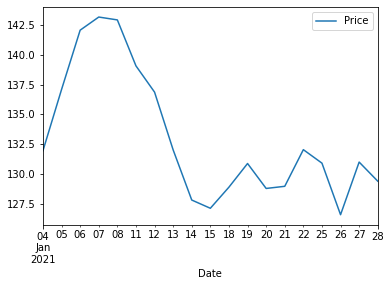

In [30]:
# shift the prices by 1
%matplotlib inline
ds.plot()

In [31]:

ds.shift(1)

,Price
Date,
2021-01-04,NaN
2021-01-05,131.96
2021-01-06,137.09
2021-01-07,142.06
2021-01-08,143.16
2021-01-11,142.92
2021-01-12,139.07
2021-01-13,136.87
2021-01-14,132.03


In [32]:
ds.shift(-1)

,Price
Date,
2021-01-04,137.09
2021-01-05,142.06
2021-01-06,143.16
2021-01-07,142.92
2021-01-08,139.07
2021-01-11,136.87
2021-01-12,132.03
2021-01-13,127.83
2021-01-14,127.14


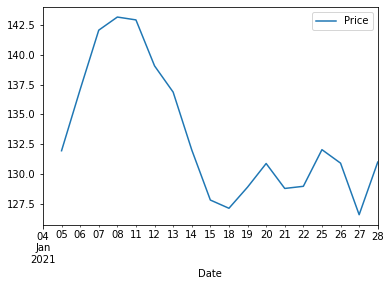

In [33]:
%matplotlib inline
ds.shift(1).plot()

In [34]:
ds['Prev Day Price']=ds['Price'].shift(1)
ds

,Price,Prev Day Price
Date,,
2021-01-04,131.96,NaN
2021-01-05,137.09,131.96
2021-01-06,142.06,137.09
2021-01-07,143.16,142.06
2021-01-08,142.92,143.16
2021-01-11,139.07,142.92
2021-01-12,136.87,139.07
2021-01-13,132.03,136.87
2021-01-14,127.83,132.03


In [35]:
ds['1 day change']= ds['Price']-ds['Prev Day Price']
ds

,Price,Prev Day Price,1 day change
Date,,,
2021-01-04,131.96,NaN,NaN
2021-01-05,137.09,131.96,5.13
2021-01-06,142.06,137.09,4.97
2021-01-07,143.16,142.06,1.10
2021-01-08,142.92,143.16,-0.24
2021-01-11,139.07,142.92,-3.85
2021-01-12,136.87,139.07,-2.20
2021-01-13,132.03,136.87,-4.84
2021-01-14,127.83,132.03,-4.20


In [36]:
ds['5 days % return']=(ds['Price']-ds['Price'].shift(5))*100/ds['Price'].shift(5)
ds

,Price,Prev Day Price,1 day change,5 days % return
Date,,,,
2021-01-04,131.96,NaN,NaN,NaN
2021-01-05,137.09,131.96,5.13,NaN
2021-01-06,142.06,137.09,4.97,NaN
2021-01-07,143.16,142.06,1.10,NaN
2021-01-08,142.92,143.16,-0.24,NaN
2021-01-11,139.07,142.92,-3.85,5.387996
2021-01-12,136.87,139.07,-2.20,-0.160479
2021-01-13,132.03,136.87,-4.84,-7.060397
2021-01-14,127.83,132.03,-4.20,-10.708298


In [40]:
#this step is performed so as to change the freq of index from none to B
ds.index=pd.date_range(start='1/2/21',periods=19,freq='B')
ds.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28'],
              dtype='datetime64[ns]', freq='B')

In [41]:
#shifting the date
ds.tshift(1)

,Price,Prev Day Price,1 day change,5 days % return
2021-01-05,131.96,NaN,NaN,NaN
2021-01-06,137.09,131.96,5.13,NaN
2021-01-07,142.06,137.09,4.97,NaN
2021-01-08,143.16,142.06,1.10,NaN
2021-01-11,142.92,143.16,-0.24,NaN
2021-01-12,139.07,142.92,-3.85,5.387996
2021-01-13,136.87,139.07,-2.20,-0.160479
2021-01-14,132.03,136.87,-4.84,-7.060397
2021-01-15,127.83,132.03,-4.20,-10.708298
2021-01-18,127.14,127.83,-0.69,-11.041142
